### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Unsupervised Learning. We will be using the facebook live sellers dataset for Task 1 & 2 of the assignment and here is a brief context about the same - The data is about live selling feature on the Facebook platform. Each record consists of information about the time live information of sale is posted to Facebook and engagements in the data. The engagements are regular Facebook interactions such as share and emotion rection.

As part of the assignment, you will have to accomplish the below tasks.


**Author:** Chintoo Kumar

###**Dataset**

Dataset Link: https://archive.ics.uci.edu/ml/datasets/Facebook+Live+Sellers+in+Thailand

**About the dataset:**

The Facebook Live Sellers in Thailand is a dataset curated in UCI Machine Learning Datasets. It data contains 7050 observations and twelve attributes. In this assignment, the preprocessed dataset contains 7050 instances and 10 attributes. The details of the attributes are as follows:

* status_type: The type of shared status
* num_reactions: Number of glimpses over a shared status by viewers
* num_comments: Number of comments on that particular shared status
* num_shares: Toal number of shares by peers
* num_likes: Number of likes on the post
* num_loves: Number of love emojis of that shared post
* num_wows: Number of wow emojis on that post
* num_hahas: Number of haha emojis on that post
* num_sads: Number of sad emojis on that post
* num_angrys: Number of angry emojis on that post

### **Task 1: Data loading and Data Analysis**

* Load the data file into a dataframe object : df
* Display the first 5 observation of the dataset
* Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.
* Perform EDA viz. Is there any missing values in each column of the provided dataset
* Display all the unique status_type of the dataframe
* Convert categorical variable, i.e., status_type into numerical representation using a label encoder

In [95]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score
from sklearn.metrics import adjusted_rand_score

from prettytable import PrettyTable

In [96]:
data = pd.read_csv("Live_20210128.csv")

In [97]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

**Columns 1,2,3,4 are all empty(no non null values), these can be deleted**

In [99]:
data.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis = 1, inplace= True)

**STATUS_ID col is just redundant information**

In [101]:
data.drop(columns = ["status_id"], inplace = True)

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       7050 non-null   object
 1   status_published  7050 non-null   object
 2   num_reactions     7050 non-null   int64 
 3   num_comments      7050 non-null   int64 
 4   num_shares        7050 non-null   int64 
 5   num_likes         7050 non-null   int64 
 6   num_loves         7050 non-null   int64 
 7   num_wows          7050 non-null   int64 
 8   num_hahas         7050 non-null   int64 
 9   num_sads          7050 non-null   int64 
 10  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 606.0+ KB


**No null values now in any of the columns**

In [104]:
for x in data.columns:
    print("No. of Null values in the col", '\033[1m' + x + '\033[0m' ,":", data[x].isna().sum())

No. of Null values in the col status_type : 0
No. of Null values in the col status_published : 0
No. of Null values in the col num_reactions : 0
No. of Null values in the col num_comments : 0
No. of Null values in the col num_shares : 0
No. of Null values in the col num_likes : 0
No. of Null values in the col num_loves : 0
No. of Null values in the col num_wows : 0
No. of Null values in the col num_hahas : 0
No. of Null values in the col num_sads : 0
No. of Null values in the col num_angrys : 0


In [105]:
data.shape

(7050, 11)

### Removing duplicates in the dataset

In [107]:
#removing duplicates
dups = data.duplicated()

print(dups.sum())

#removing duplicate rows from the data

data.drop_duplicates(inplace = True)

dups = data.duplicated()

print(dups.sum())

54
0


In [108]:
data.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000
mean,225.091052,225.648799,40.275872,210.036735,12.757004,1.253431,0.698256,0.232704,0.110206
std,452.953875,892.922206,132.072584,439.623067,40.114602,8.727383,3.971738,1.481415,0.688726
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.250000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


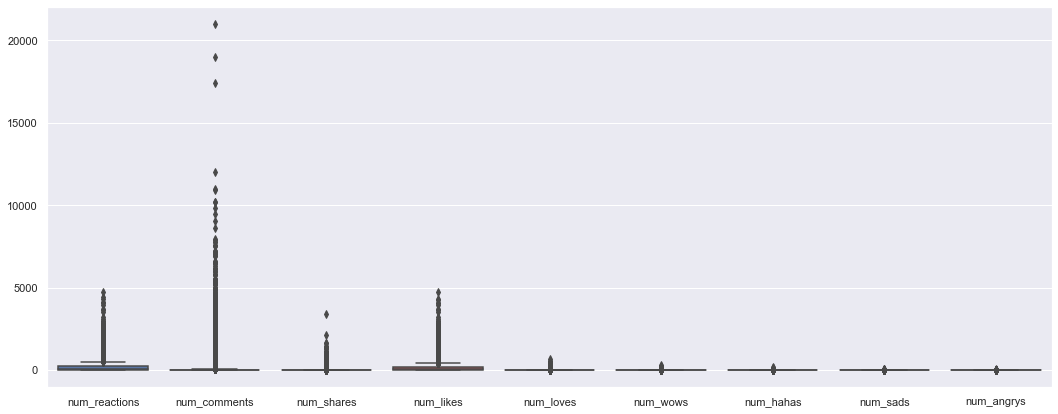

In [109]:
sns.set(rc={'figure.figsize':(18,7)})

sns.boxplot( data=data)
#data.boxplot(column = ["num_reactions"])
plt.show()

**It can be clearly seen from the box plot that the data contains outliers, (especially features: num_comments and num_shares)**

In [110]:
print(data["status_type"].value_counts())

photo     4242
video     2332
status     359
link        63
Name: status_type, dtype: int64


In [111]:
#without encoding status_type
data.to_pickle("cleaned_data_without_encoding.pickle")

In [114]:
encoded_status_type = LabelEncoder().fit_transform(data["status_type"])

data.insert(1,'encoded_status_type',encoded_status_type)

data.head()

,status_type,encoded_status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_encoded
0,video,3,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,3
1,photo,1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1
2,video,3,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,3
3,photo,1,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,1
4,photo,1,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,1


In [121]:
#label encoded data
data.to_pickle("label_encoded_data.pickle")

In [127]:
data.shape

(6996, 12)

#### Handling the outliers

In [133]:
#Xdash = X.drop("status_published", axis = 1)
#print(Xdash.shape)

XXX = data

In [134]:
#first remove rows based on the outliers of num_comments column
#Any point which is 3 standard deviation's(i.e. z score > 3) away is considered an outlier for the current case
XXX = XXX[(np.abs(stats.zscore(XXX["num_comments"])) < 3)]

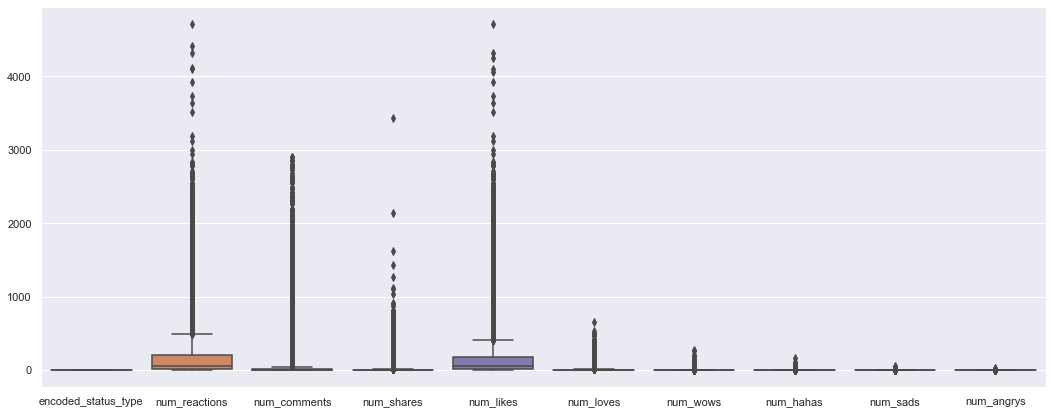

In [135]:
#plotting boxplot for each numeric column and checking if there are any outliers
sns.set(rc={'figure.figsize':(18,7)})

sns.boxplot(data=XXX)
plt.show()

From the boxplots num_shares looks to be having a outliers let's try applying the same z score < 3 as used above

In [137]:
XXX = XXX[(np.abs(stats.zscore(XXX["num_shares"])) < 3)]

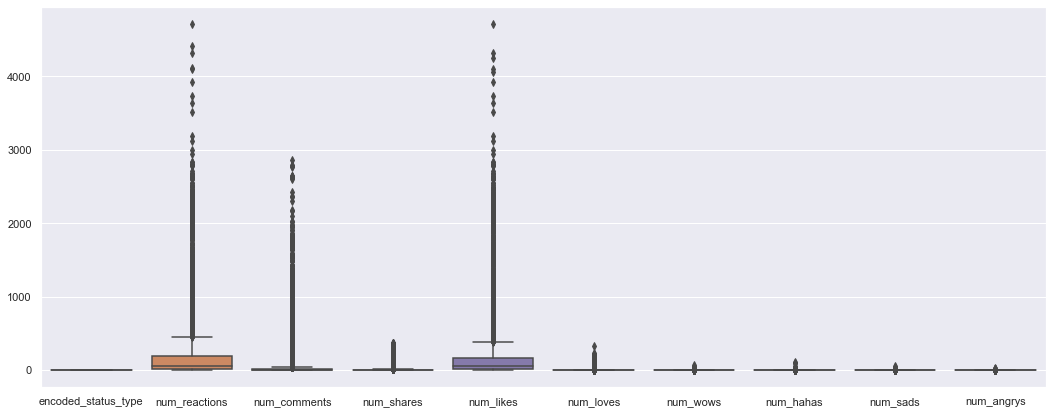

In [138]:
#plotting boxplot for each numeric column and checking if there are any outliers
sns.set(rc={'figure.figsize':(18,7)})

sns.boxplot(data=XXX)
plt.show()

In [139]:
XXX.shape

(6727, 12)

In [140]:
#removing rows based on num_likes
XXX = XXX[(np.abs(stats.zscore(XXX["num_likes"])) < 3)]

In [141]:
XXX.shape

(6516, 12)

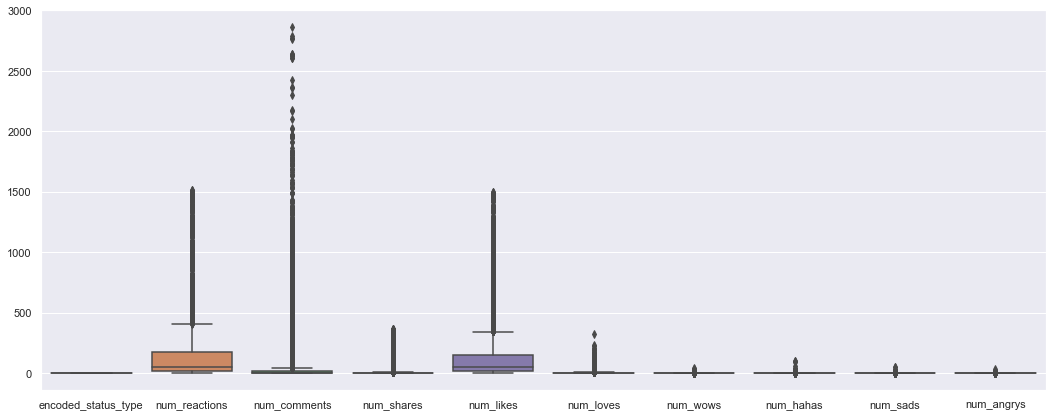

In [142]:
#plotting boxplot for each numeric column and checking if there are any outliers
sns.set(rc={'figure.figsize':(18,7)})

sns.boxplot(data=XXX)
plt.show()

In [143]:
XXX.describe()

,encoded_status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6516.00000,6516.000000,6516.000000,6516.000000
mean,1.661602,139.885666,96.992634,20.757827,130.844690,7.797882,0.59515,0.408379,0.164058,0.072591
std,0.928184,229.304239,290.565849,59.983602,223.335078,22.089571,1.85813,2.657078,1.330071,0.619789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,16.000000,0.000000,0.000000,16.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,48.000000,3.000000,0.000000,47.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,3.000000,173.000000,16.000000,2.000000,147.000000,2.000000,0.00000,0.000000,0.000000,0.000000
max,3.000000,1517.000000,2863.000000,366.000000,1497.000000,320.000000,38.00000,102.000000,51.000000,31.000000


In [146]:
data = XXX

In [147]:
data.head()

,status_type,encoded_status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,3,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,3,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,1,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,1,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [149]:
#checking the number of each status type
print(XXX["status_type"].value_counts())
print(XXX["encoded_status_type"].value_counts())

photo     4108
video     2019
status     331
link        58
Name: status_type, dtype: int64
1    4108
3    2019
2     331
0      58
Name: encoded_status_type, dtype: int64


In [150]:
data.to_pickle("Outliers_removed.pickle")

In [151]:
Y = data["status_type"]

X = data.drop(columns = "status_type")

###**Task 2: Feature Scaling**


*   Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique
*   Use Elbow method to determine the number of cluster to be formed
*   Verify optimal number of clusers on the basis of silhouette scores
*   Assigning cluster label to each instance of the dataframe
*   Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score


In [153]:
features_X = list(X.columns)

features_X

['encoded_status_type',
 'status_published',
 'num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys']

In [156]:
X["status_published"] = pd.to_datetime(X["status_published"])

In [159]:
X.head()

,encoded_status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,1,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,3,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,1,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,1,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


In [161]:
#let's retain the day of the week published
#maybe if the day is a weekend it may effect the type of the status published 

status_published = X['status_published']

X["status_published"] = X['status_published'].dt.dayofweek

X.head()

,encoded_status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,6,529,512,262,432,92,3,1,1,0
1,1,5,150,0,0,150,0,0,0,0,0
2,3,5,227,236,57,204,21,1,1,0,0
3,1,5,111,0,0,111,0,0,0,0,0
4,1,2,213,0,0,204,9,0,0,0,0


In [162]:
X.describe()

,encoded_status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6516.00000,6516.000000,6516.000000,6516.000000
mean,1.661602,3.009362,139.885666,96.992634,20.757827,130.844690,7.797882,0.59515,0.408379,0.164058,0.072591
std,0.928184,2.015079,229.304239,290.565849,59.983602,223.335078,22.089571,1.85813,2.657078,1.330071,0.619789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,16.000000,0.000000,0.000000,16.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,48.000000,3.000000,0.000000,47.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,3.000000,5.000000,173.000000,16.000000,2.000000,147.000000,2.000000,0.00000,0.000000,0.000000,0.000000
max,3.000000,6.000000,1517.000000,2863.000000,366.000000,1497.000000,320.000000,38.00000,102.000000,51.000000,31.000000


In [163]:
X_arr = X.loc[:,features_X].values

X_scaled_arr = MinMaxScaler().fit_transform(X_arr)

X_scaled = pd.DataFrame(X_scaled_arr, columns = features_X)

X_scaled.head()

,encoded_status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,1.000000,0.348715,0.178833,0.715847,0.288577,0.287500,0.078947,0.009804,0.019608,0.0
1,0.333333,0.833333,0.098879,0.000000,0.000000,0.100200,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.833333,0.149637,0.082431,0.155738,0.136273,0.065625,0.026316,0.009804,0.000000,0.0
3,0.333333,0.833333,0.073171,0.000000,0.000000,0.074148,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.333333,0.140409,0.000000,0.000000,0.136273,0.028125,0.000000,0.000000,0.000000,0.0


In [173]:
wcss = []
sil = []
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    labels = kmeans.predict(X_scaled)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(X_scaled, labels, metric = 'euclidean'))

In [183]:
print(wcss)
print(sil)

[1305.7104620434109, 920.0586196049726, 750.7327134481469, 592.7462353627508, 477.9753543191607, 411.7069293681983, 375.63454131026685, 351.738447268637]
[0.4114476794527818, 0.4098250041190077, 0.43158695887259385, 0.45474507810522036, 0.4692787878416678, 0.43482457538392105, 0.4357107983290666, 0.42139426018611537]


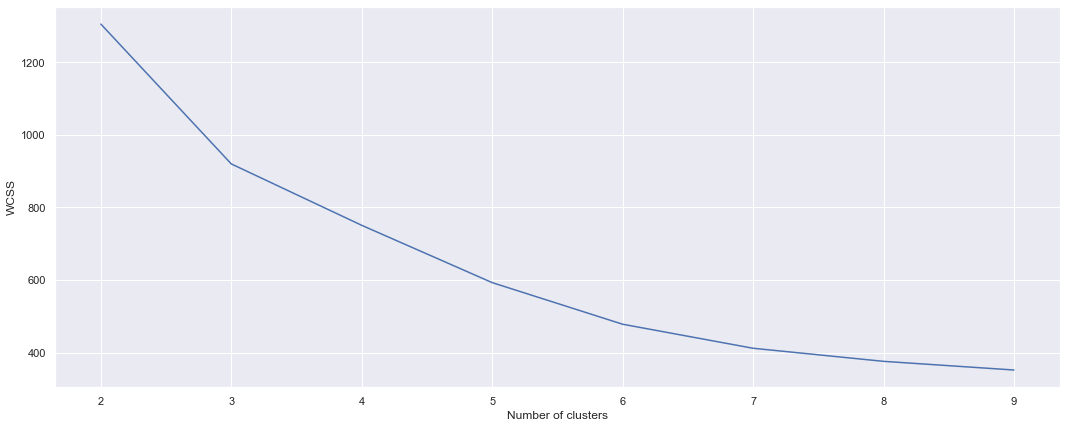

In [174]:
plt.plot(range(2,10), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

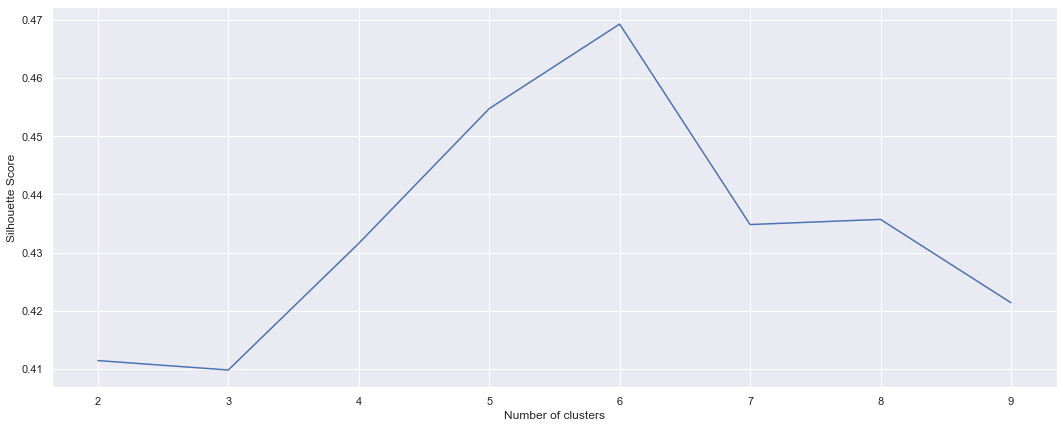

In [175]:
plt.plot(range(2,10), sil)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

**So from above we can take k = 6, which is validated using silhouette scores, this can be because we have used the day of the week(so we're getting more cluster than the status_type)**

In [176]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++')
kmeans.fit(X_scaled)
pred = kmeans.predict(X_scaled)

In [177]:
X_final = pd.DataFrame(X_scaled)

X_final["cluster"] = pred

X_final["cluster"].value_counts()

0    2354
2    1764
3     960
1     727
5     474
4     237
Name: cluster, dtype: int64

In [178]:
X_final["status_published"].value_counts()

0.166667    976
1.000000    974
0.666667    936
0.000000    923
0.833333    911
0.333333    898
0.500000    898
Name: status_published, dtype: int64

In [219]:
rand_score_label_label_encoding_with_day = rand_score(Y,X_final["cluster"])

rand_score_label_label_encoding_with_day

0.7094383410432646

In [221]:
adjusted_rand_score_label_encoding_with_day = adjusted_rand_score(Y,X_final["cluster"])

adjusted_rand_score_label_encoding_with_day 

0.4165243084818336

**Clustering after dropping the status_published column**

In [181]:
X_cleaned = X.drop(columns = 'status_published', axis = 1)

X_cleaned

,encoded_status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [182]:
features_X_cleaned = list(X_cleaned.columns)

X_cleaned_arr = X_cleaned.loc[:,features_X_cleaned].values

X_cleaned_scaled_arr = MinMaxScaler().fit_transform(X_cleaned_arr)

X_cleaned_scaled = pd.DataFrame(X_cleaned_scaled_arr, columns = features_X_cleaned)

X_cleaned_scaled.head()

,encoded_status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.348715,0.178833,0.715847,0.288577,0.287500,0.078947,0.009804,0.019608,0.0
1,0.333333,0.098879,0.000000,0.000000,0.100200,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.149637,0.082431,0.155738,0.136273,0.065625,0.026316,0.009804,0.000000,0.0
3,0.333333,0.073171,0.000000,0.000000,0.074148,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.140409,0.000000,0.000000,0.136273,0.028125,0.000000,0.000000,0.000000,0.0


In [185]:
wcss_cleaned = []
sil_cleaned = []
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_cleaned_scaled)
    labels = kmeans.predict(X_cleaned_scaled)
    wcss_cleaned.append(kmeans.inertia_)
    sil_cleaned.append(silhouette_score(X_cleaned_scaled, labels, metric = 'euclidean'))

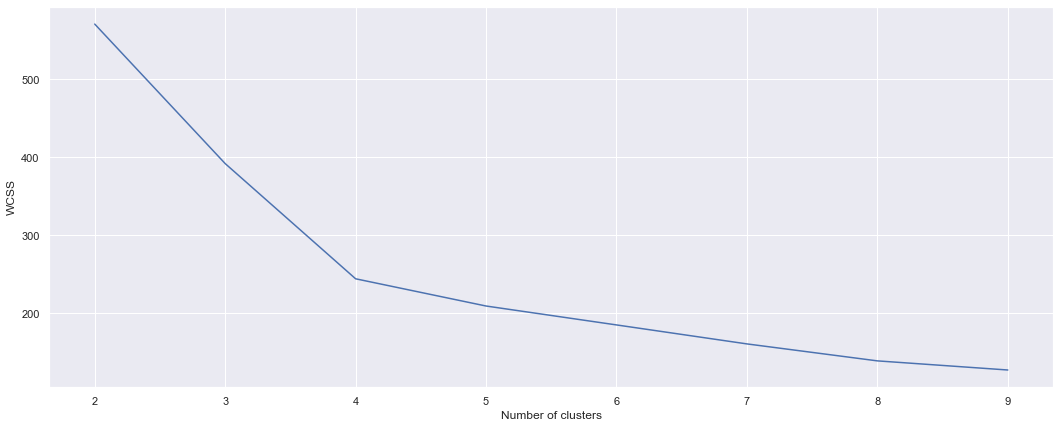

In [186]:
plt.plot(range(2,10), wcss_cleaned)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

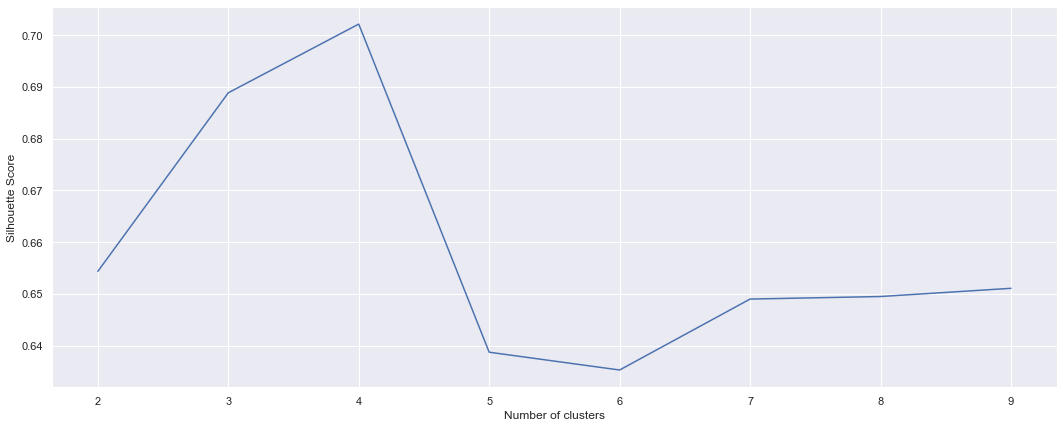

In [187]:
plt.plot(range(2,10), sil_cleaned)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

**Now the clusters are equal to 4 which matches our status_type's, so it could be that the day_of_the_week(or datetime) is not much important**

In [188]:
kmeans_cleaned = KMeans(n_clusters = 4, init = 'k-means++')
kmeans_cleaned.fit(X_cleaned_scaled)
pred_cleaned = kmeans_cleaned.predict(X_cleaned_scaled)

In [189]:
X_cleaned_final = pd.DataFrame(X_cleaned_scaled)

X_cleaned_final["cluster"] = pred_cleaned

X_cleaned_final["cluster"].value_counts()

1    4031
0    1661
2     554
3     270
Name: cluster, dtype: int64

In [190]:
X_final["encoded_status_type"].value_counts()

0.333333    4108
1.000000    2019
0.666667     331
0.000000      58
Name: encoded_status_type, dtype: int64

In [217]:
rand_score_label_encoding = rand_score(Y,X_cleaned_final["cluster"])

rand_score_label_encoding

0.9054229579282262

In [218]:
adjusted_rand_score_label_encoding = adjusted_rand_score(Y,X_cleaned_final["cluster"])

adjusted_rand_score_label_encoding

0.8107161518280009

#### Encoding categorical variable using One-hot-encoder

Since there's no inherent order in the status_type's OneHotEncoding could be better to encode(Although this will increase the dimensionality of status_type from 1 to 4)

In [191]:
data.head()

,status_type,encoded_status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,3,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,3,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,1,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,1,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [194]:
X_new = data.drop(columns = ['encoded_status_type', 'status_published'], axis = 1)

X_new.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [203]:
encoded_cols = list(one_hot_encoded_status_type.columns)
k = 1
for i in encoded_cols:
    extract_col = one_hot_encoded_status_type[i]
    X_new.insert(k, i, extract_col)
    k+=1

In [205]:
X_new.drop(columns ='status_type', axis = 1, inplace = True)

X_new.head()

,link,photo,status,video,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,0,0,1,529,512,262,432,92,3,1,1,0
1,0,1,0,0,150,0,0,150,0,0,0,0,0
2,0,0,0,1,227,236,57,204,21,1,1,0,0
3,0,1,0,0,111,0,0,111,0,0,0,0,0
4,0,1,0,0,213,0,0,204,9,0,0,0,0


In [206]:
X_new.describe()

,link,photo,status,video,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6516.000000,6516.00000,6516.000000,6516.000000,6516.000000
mean,0.008901,0.630448,0.050798,0.309853,139.885666,96.992634,20.757827,130.844690,7.797882,0.59515,0.408379,0.164058,0.072591
std,0.093932,0.482720,0.219602,0.462468,229.304239,290.565849,59.983602,223.335078,22.089571,1.85813,2.657078,1.330071,0.619789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,16.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,48.000000,3.000000,0.000000,47.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,173.000000,16.000000,2.000000,147.000000,2.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1517.000000,2863.000000,366.000000,1497.000000,320.000000,38.00000,102.000000,51.000000,31.000000


In [207]:
features_new_X = list(X_new.columns)
X_new_arr = X_new.loc[:,features_new_X ].values

X_new_scaled_arr = MinMaxScaler().fit_transform(X_new_arr)

X_new_scaled = pd.DataFrame(X_new_scaled_arr, columns = features_new_X)

X_new_scaled.head()

,link,photo,status,video,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.0,0.0,0.0,1.0,0.348715,0.178833,0.715847,0.288577,0.287500,0.078947,0.009804,0.019608,0.0
1,0.0,1.0,0.0,0.0,0.098879,0.000000,0.000000,0.100200,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,1.0,0.149637,0.082431,0.155738,0.136273,0.065625,0.026316,0.009804,0.000000,0.0
3,0.0,1.0,0.0,0.0,0.073171,0.000000,0.000000,0.074148,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,1.0,0.0,0.0,0.140409,0.000000,0.000000,0.136273,0.028125,0.000000,0.000000,0.000000,0.0


In [208]:
wcss_one_hot = []
sil_one_hot = []
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 63)
    kmeans.fit(X_new_scaled)
    labels = kmeans.predict(X_new_scaled)
    wcss_one_hot.append(kmeans.inertia_)
    sil_one_hot.append(silhouette_score(X_new_scaled, labels, metric = 'euclidean'))

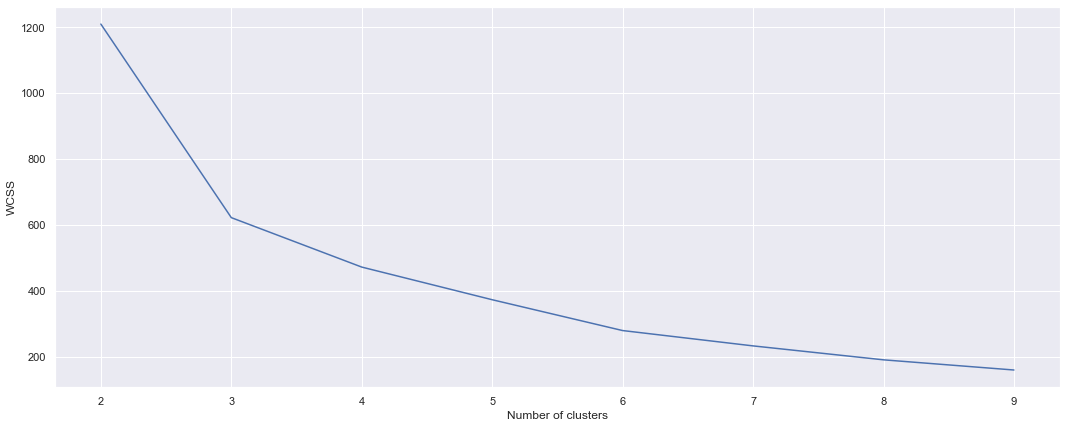

In [209]:
plt.plot(range(2,10), wcss_one_hot)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

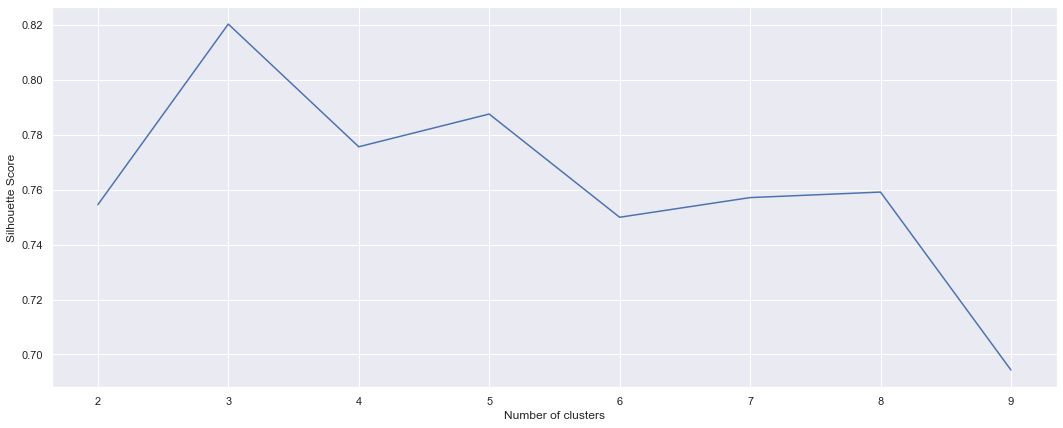

In [210]:
plt.plot(range(2,10), sil_one_hot)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

**So k = 4 can be chosen**

In [211]:
kmeans_cleaned = KMeans(n_clusters = 4, init = 'k-means++')
kmeans_cleaned.fit(X_new_scaled)
pred_cleaned = kmeans_cleaned.predict(X_new_scaled)

In [212]:
X_new_final = pd.DataFrame(X_new_scaled)

X_new_final["cluster"] = pred_cleaned

X_new_final["cluster"].value_counts()

1    4108
0    1468
2     551
3     389
Name: cluster, dtype: int64

In [213]:
data["status_type"].value_counts()

photo     4108
video     2019
status     331
link        58
Name: status_type, dtype: int64

In [215]:
rand_score_one_hot = rand_score(Y,X_new_final["cluster"])

rand_score_one_hot

0.960987888835652

In [216]:
adjusted_rand_score_one_hot = adjusted_rand_score(Y,X_new_final["cluster"])

adjusted_rand_score_one_hot

0.9219250941797497

In [227]:
myTable = PrettyTable(["Encoding Type", "No of Clusters", "Rand Score", "Adjusted Rand Score"])
  
# Add rows
myTable.add_row(["Label-Encoding(with day of the week)", "6", "0.7094383410432646", "0.4165243084818336"])
myTable.add_row(["Label-Encoding", "4", "0.9054229579282262", "0.8107161518280009"])
myTable.add_row(["One-Hot-Encoding", "4" , "0.960987888835652", "0.9219250941797497"])
  
print(myTable)

+--------------------------------------+----------------+--------------------+---------------------+
|            Encoding Type             | No of Clusters |     Rand Score     | Adjusted Rand Score |
+--------------------------------------+----------------+--------------------+---------------------+
| Label-Encoding(with day of the week) |       6        | 0.7094383410432646 |  0.4165243084818336 |
|            Label-Encoding            |       4        | 0.9054229579282262 |  0.8107161518280009 |
|           One-Hot-Encoding           |       4        | 0.960987888835652  |  0.9219250941797497 |
+--------------------------------------+----------------+--------------------+---------------------+


**Using One hot encoding for the status type, the k means clustering gave the best results for the current dataset**

###**Task 3: Perform PCA on Fruit Dataset**

Fruit Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv

* Use PCA to find the first two principal components of the fruit dataset
* Scale the value. Each feature should be centered (zero mean) and with unit variance
* Analysis - perform PCA with 4 components and print their explained variance_ratio


In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [77]:
fruit = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv")

fruit_Y = fruit["fruit_label"]

fruit_X = fruit.drop("fruit_label", axis = 1)

In [78]:
print(fruit_X.shape)
fruit_X.head()

(59, 4)


,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [79]:
print(fruit_Y.shape)
fruit_Y.head()

(59,)


0    1
1    1
2    1
3    2
4    2
Name: fruit_label, dtype: int64

In [80]:
fruit_X.describe()

,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000
mean,163.118644,7.105085,7.693220,0.762881
std,55.018832,0.816938,1.361017,0.076857
min,76.000000,5.800000,4.000000,0.550000
25%,140.000000,6.600000,7.200000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,177.000000,7.500000,8.200000,0.810000
max,362.000000,9.600000,10.500000,0.930000


In [81]:
features = list(fruit_X.columns)
print(features)

x = fruit_X.loc[:, features].values

['mass', 'width', 'height', 'color_score']


### PCA without standardization

In [82]:
pca = PCA(n_components = 2)

pcomps_2_without = pca.fit_transform(x)

p_df_without = pd.DataFrame(data = pcomps_2_without, columns = ['principal comp_1', 'principal comp_2'])

final_X_without = pd.concat([p_df_without, fruit[["fruit_label"]]], axis = 1)

print(pca.explained_variance_ratio_)

[9.99563313e-01 3.91819537e-04]


**It's clear since the data is not standardized the first component has highest explained variancec of ~99.9%**

**So we need to standardize before performing PCA**

In [83]:
fruit_XX = StandardScaler().fit_transform(x)
fruit_X_std = pd.DataFrame(fruit_XX, columns = features)

#standardized data using standardscaler of sklearn
fruit_X_std.head()

,mass,width,height,color_score
0,0.529442,1.598690,-0.291397,-2.793595
1,0.309462,1.104854,-0.661922,-2.268684
2,0.236136,0.364100,-0.365502,-2.137456
3,-1.413709,-1.117409,-2.218131,0.487100
4,-1.450372,-1.364327,-2.292236,0.355872


In [84]:
fruit_X_std.describe()

,mass,width,height,color_score
count,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01
mean,-2.653245e-16,-1.042481e-15,-6.887146e-16,-2.991957e-16
std,1.008584e+00,1.008584e+00,1.008584e+00,1.008584e+00
min,-1.597025e+00,-1.611245e+00,-2.736867e+00,-2.793595e+00
25%,-4.238020e-01,-6.235729e-01,-3.655018e-01,-5.627226e-01
50%,-9.383299e-02,1.171815e-01,-6.908109e-02,-1.690392e-01
75%,2.544676e-01,4.875587e-01,3.755499e-01,6.183276e-01
max,3.645816e+00,3.080199e+00,2.079969e+00,2.193061e+00


### PCA after standardizing dataset

In [85]:
#pca after standardization
pca2 = PCA(n_components = 2)

pcomps = pca2.fit_transform(fruit_XX)

p_df = pd.DataFrame(data = pcomps, columns = ['principal comp 1', 'principal comp 2'])

In [88]:
#adding back the target label
final_X = pd.concat([p_df, fruit[["fruit_label"]]], axis = 1)
final_X.head()

,principal comp 1,principal comp 2,fruit_label
0,1.572169,-1.980044,1
1,0.878417,-1.579373,1
2,0.529773,-1.732891,1
3,-2.712610,0.414674,2
4,-2.893412,0.242003,2


In [89]:
pca2.explained_variance_ratio_

array([0.57845054, 0.25650171])

**Principal component 1 and 2 explains ~57.84% & ~25.65% of the total variance respectively**

In [90]:
target = list(final_X["fruit_label"].unique())

print(target)

#colors for the different target values 1,2,3,4

color_targets = ['r','g','b','k']

[1, 2, 3, 4]


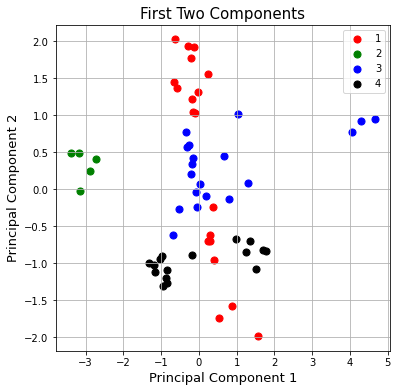

In [91]:
#scatter plot for the 2 components PCA
fig = plt.figure(figsize = (6,6))

grp = fig.add_subplot(1,1,1)

grp.set_xlabel('Principal Component 1', fontsize = 13)
grp.set_ylabel('Principal Component 2', fontsize = 13)
grp.set_title('First Two Components', fontsize = 15)

for t, color in zip(target,color_targets):
    keep = final_X["fruit_label"] == t
    grp.scatter(final_X.loc[keep, 'principal comp 1'], final_X.loc[keep, 'principal comp 2'], c = color, s = 50)

grp.legend(target)
grp.grid()

### PCA with 4 components

In [92]:
pca4 = PCA(n_components = 4)

pcomps_4 = pca4.fit_transform(fruit_XX)

p_df4 = pd.DataFrame(data = pcomps_4, columns = ['pc1', 'pc2', 'pc3', 'pc4'])

In [93]:
final_4_comps = pd.concat([p_df4, fruit[["fruit_label"]]], axis = 1)
final_4_comps.head()

,pc1,pc2,pc3,pc4,fruit_label
0,1.572169,-1.980044,2.048688,-0.368504,1
1,0.878417,-1.579373,1.899455,-0.166053,1
2,0.529773,-1.732891,1.258227,0.154708,1
3,-2.712610,0.414674,0.923164,0.148685,2
4,-2.893412,0.242003,0.909229,0.298106,2


In [94]:
pca4.explained_variance_ratio_

array([0.57845054, 0.25650171, 0.14402362, 0.02102413])

**Principal component 1, 2, 3 & 4 explains ~57.84%, ~25.65%, ~14.4% & 2% of the total variance respectively**

**So first 3 Principal components can retain a total of ~97% of the total variance**